In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, precision_score, accuracy_score, f1_score
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_3countries = pd.read_csv("data/3countries.csv", index_col=0)
df_all = pd.read_csv("data/ALL.csv", index_col=0)

In [3]:
df_all.head()

,ID,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Halobacteria,k__Archaea|p__Euryarchaeota|c__Halobacteria|o__Halobacteriales,k__Archaea|p__Euryarchaeota|c__Halobacteria|o__Halobacteriales|f__Halobacteriaceae,k__Archaea|p__Euryarchaeota|c__Halobacteria|o__Halobacteriales|f__Halobacteriaceae|g__Halococcus,k__Archaea|p__Euryarchaeota|c__Halobacteria|o__Halobacteriales|f__Halobacteriaceae|g__Halococcus|s__Halococcus_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,...,k__Viruses|p__Viruses_noname|c__Viruses_noname|o__Viruses_noname|f__Retroviridae|g__Retroviridae_noname,k__Viruses|p__Viruses_noname|c__Viruses_noname|o__Viruses_noname|f__Retroviridae|g__Retroviridae_noname|s__Avian_endogenous_retrovirus_EAV_HP,k__Viruses|p__Viruses_noname|c__Viruses_noname|o__Viruses_noname|f__Retroviridae|g__Retroviridae_noname|s__Avian_endogenous_retrovirus_EAV_HP|t__PRJNA15213,k__Viruses|p__Viruses_noname|c__Viruses_noname|o__Viruses_noname|f__Viruses_noname,k__Viruses|p__Viruses_noname|c__Viruses_noname|o__Viruses_noname|f__Viruses_noname|g__Viruses_noname,k__Viruses|p__Viruses_noname|c__Viruses_noname|o__Viruses_noname|f__Viruses_noname|g__Viruses_noname|s__Staphylococcus_phage_PT1028,k__Viruses|p__Viruses_noname|c__Viruses_noname|o__Viruses_noname|f__Viruses_noname|g__Viruses_noname|s__Staphylococcus_phage_PT1028|t__PRJNA15262,k__Viruses|p__Viruses_noname|c__Viruses_noname|o__Viruses_noname|f__Viruses_noname|g__Viruses_noname|s__Staphylococcus_phage_ROSA,k__Viruses|p__Viruses_noname|c__Viruses_noname|o__Viruses_noname|f__Viruses_noname|g__Viruses_noname|s__Staphylococcus_phage_ROSA|t__PRJNA15274,Humans
0,AKL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000186
1,AKL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002511
2,AKL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002478
3,AKL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000140
4,AKL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000140


In [4]:
def get_species_level(columns):
    features = ['ID']
    for feature in columns:
        if len(feature.split('|s__')) > 1:
            if len(feature.split('|s__')[1].split('|')) == 1:
                features.extend([feature]) 
    print(len(features))
    return features

In [5]:
def get_genus_level(columns):
    features = ['ID']
    for feature in columns:
        if len(feature.split('|g__')) > 1:
            if len(feature.split('|g__')[1].split('|')) == 1:
                features.extend([feature]) 
    print(len(features))
    return features

In [6]:
columns_3countries = df_3countries.columns
columns_all = df_all.columns

In [7]:
all_features = columns_all
all_species_features = get_species_level(columns_all)
all_species_features.extend(["Humans"])
all_genus_features = get_genus_level(columns_all)
all_genus_features.extend(["Humans"])

737
313


In [8]:
countries_features = columns_3countries
countries_species_features = get_species_level(columns_3countries)
countries_species_features.extend(["Humans"])
countries_genus_features = get_genus_level(columns_3countries)
countries_genus_features.extend(["Humans"])

563
250


In [9]:
df_all_all = df_all.filter(all_features)
df_all_species = df_all.filter(all_species_features)
df_all_genus = df_all.filter(all_genus_features)

In [10]:
df_3countries_all = df_3countries.filter(countries_features)
df_3countries_species = df_3countries.filter(countries_species_features)
df_3countries_genus = df_3countries.filter(countries_genus_features)

In [11]:
def getXY(df):
    X = df.iloc[:,1:]
    y = df.iloc[:,0]
    return X, y

In [12]:
X_all_all, y_all_all = getXY(df_all_all)
X_all_species, y_all_species = getXY(df_all_species)
X_all_genus, y_all_genus = getXY(df_all_genus)

In [13]:
X_3countries_all, y_3countries_all = getXY(df_3countries_all)
X_3countries_species, y_3countries_species = getXY(df_3countries_species)
X_3countries_genus, y_3countries_genus = getXY(df_3countries_genus)

<h2>KNN</h2>

<h3>Cross validation</h3>

In [14]:
def cross_validation(X_train, y_train):
    KList = list(range(1,50))
    neighbors = list(filter(lambda x: x % 2 != 0, KList))
    cv_scores = []

    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())

    # misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]
    print("The optimal number of neighbors is", optimal_k)

    plt.plot(neighbors, MSE)
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.title("The optimal number of neighbors is "+ str(optimal_k))
    plt.show()

The optimal number of neighbors is 1


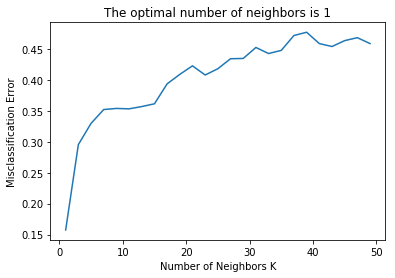

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_all_all, y_all_all, test_size=0.33, random_state=42, shuffle=True)
cross_validation(X_train, y_train)

<h3>KNN - all 7 cities</h3>

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_all_all, y_all_all, test_size=0.33, random_state=42, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
preds = knn.predict(X_test)
print(precision_recall_fscore_support(y_test, preds, average='weighted'))
print(precision_score(y_test, preds, average='weighted'))
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds, average='weighted'))

(0.76103015547765418, 0.7289719626168224, 0.7367971330194647, None)
0.761030155478
0.728971962617
0.736797133019


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_all_species, y_all_species, test_size=0.33, random_state=42, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
preds = knn.predict(X_test)
print(precision_recall_fscore_support(y_test, preds, average='weighted'))
print(precision_score(y_test, preds, average='weighted'))
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds, average='weighted'))

(0.78107386137391044, 0.76635514018691586, 0.7690220047514561, None)
0.781073861374
0.766355140187
0.769022004751


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_all_genus, y_all_genus, test_size=0.33, random_state=42, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
preds = knn.predict(X_test)
print(precision_recall_fscore_support(y_test, preds, average='weighted'))
print(precision_score(y_test, preds, average='weighted'))
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds, average='weighted'))

(0.80161685766750579, 0.7289719626168224, 0.72911787021161556, None)
0.801616857668
0.728971962617
0.729117870212


<h3>KNN - 3 countries</h3>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_3countries_all, y_3countries_all, test_size=0.33, random_state=42, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
preds = knn.predict(X_test)
print(precision_recall_fscore_support(y_test, preds, average='weighted'))
print(precision_score(y_test, preds, average='weighted'))
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds, average='weighted'))

(0.90735964385400847, 0.89156626506024095, 0.89249017166184652, None)
0.907359643854
0.89156626506
0.892490171662


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_3countries_species, y_3countries_species, test_size=0.33, random_state=42, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
preds = knn.predict(X_test)
print(precision_recall_fscore_support(y_test, preds, average='weighted'))
print(precision_score(y_test, preds, average='weighted'))
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds, average='weighted'))

(0.92789339174881347, 0.92771084337349397, 0.92683878370625361, None)
0.927893391749
0.927710843373
0.926838783706


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_3countries_genus, y_3countries_genus, test_size=0.33, random_state=42, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
preds = knn.predict(X_test)
print(precision_recall_fscore_support(y_test, preds, average='weighted'))
print(precision_score(y_test, preds, average='weighted'))
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds, average='weighted'))

(0.91614075349015101, 0.91566265060240959, 0.91569082880133967, None)
0.91614075349
0.915662650602
0.915690828801


<h3>KNN - Cluster Visualization</h3>

In [22]:
def plot_clusters(data, y, nc):
    reduced_svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42) #reduce to 2 dimensions
    svd_data_reduced = reduced_svd.fit_transform(data)
    
    if nc == 7:
        for i in range(0, svd_data_reduced.shape[0]):
            if y.iloc[i] == "AKL":
                c1 = plt.scatter(svd_data_reduced[i,0],svd_data_reduced[i,1],c='r', marker='+')
            elif y.iloc[i] == "HAM":
                c2 = plt.scatter(svd_data_reduced[i,0],svd_data_reduced[i,1],c='b', marker='+')
            elif y.iloc[i] == "SAC":
                c3 = plt.scatter(svd_data_reduced[i,0],svd_data_reduced[i,1],c='y', marker='o')
            elif y.iloc[i] == "NYC":
                c4 = plt.scatter(svd_data_reduced[i,0],svd_data_reduced[i,1],c='g', marker='o')
            elif y.iloc[i] == "SCL":
                c5 = plt.scatter(svd_data_reduced[i,0],svd_data_reduced[i,1],c='black', marker='*')
            elif y.iloc[i] == "PXO":
                c6 = plt.scatter(svd_data_reduced[i,0],svd_data_reduced[i,1],c='purple', marker='x')
            else:
                c7 = plt.scatter(svd_data_reduced[i,0],svd_data_reduced[i,1],c='cyan', marker='d')
        plt.legend([c1, c2, c3, c4, c5, c6, c7], ["AKL", "HAM", "SAC", "NYC", "SCL", "PXO", "OFA"])
        plt.title('7 cities')
        plt.show()
        
    else:
        for i in range(0, svd_data_reduced.shape[0]):
            if y.iloc[i] == "NZ":
                c1 = plt.scatter(svd_data_reduced[i,0],svd_data_reduced[i,1],c='r', marker='+')
            elif y.iloc[i] == "USA":
                c2 = plt.scatter(svd_data_reduced[i,0],svd_data_reduced[i,1],c='g', marker='o')
            else:
                c3 = plt.scatter(svd_data_reduced[i,0],svd_data_reduced[i,1],c='b', marker='*')
        plt.legend([c1, c2, c3], ['NZ', 'USA', 'PXO'])
        plt.title('3 countries')
        plt.show()

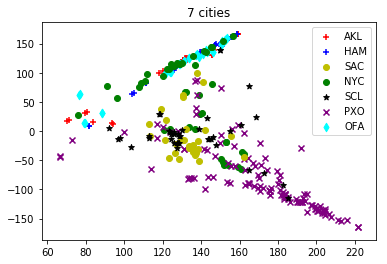

In [23]:
plot_clusters(X_all_all, y_all_all, 7)

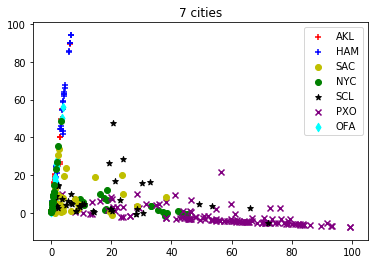

In [24]:
plot_clusters(X_all_species, y_all_species, 7)

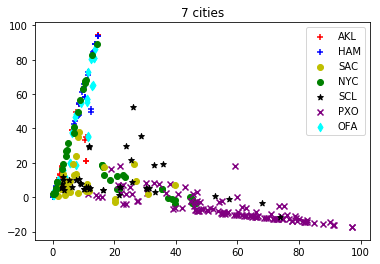

In [25]:
plot_clusters(X_all_genus, y_all_genus, 7)

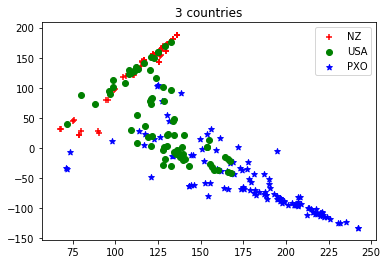

In [26]:
plot_clusters(X_3countries_all, y_3countries_all, 3)

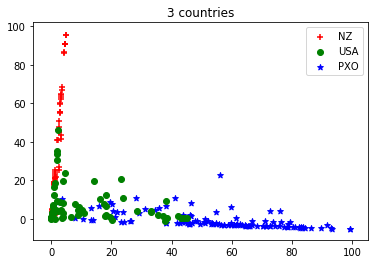

In [27]:
plot_clusters(X_3countries_species, y_3countries_species, 3)

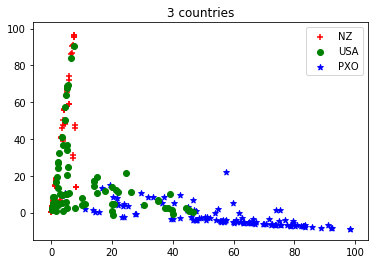

In [28]:
plot_clusters(X_3countries_genus, y_3countries_genus, 3)

<h2>Random Forest</h2>

<h3>Grid Search</h3>

In [29]:
def grid_search(X_train, y_train):
    param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 15, 18, 20, 25, 100],
    'max_features': ['log2', 50, 100, 0.5, 'auto'],
    'n_estimators': [10, 100]
    }
    rf = RandomForestClassifier(class_weight="balanced", random_state=0)
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='accuracy',
                          cv = 3, n_jobs = -1, verbose = 0)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_rf = grid_search.best_estimator_
    print(best_params)
    print(best_score)
    return best_rf

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_all_all, y_all_all, test_size=0.33, random_state=42, shuffle=True)
best_rf_all = grid_search(X_train, y_train)

{'bootstrap': True, 'max_depth': 10, 'max_features': 100, 'n_estimators': 100}
0.902325581395


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_3countries_all, y_3countries_all, test_size=0.33, random_state=42, shuffle=True)
best_rf_3countries = grid_search(X_train, y_train)

{'bootstrap': True, 'max_depth': 10, 'max_features': 50, 'n_estimators': 100}
0.946107784431


<h3> Random Forest - all 7 cities</h2>

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_all_all, y_all_all, test_size=0.33, random_state=42, shuffle=True)
#rf = RandomForestClassifier(class_weight="balanced", max_features=100, max_depth=20, random_state=0)
best_rf_all.fit(X_train, y_train) 
preds = best_rf_all.predict(X_test)
print(precision_recall_fscore_support(y_test, preds, average='weighted'))
print(precision_score(y_test, preds, average='weighted'))
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds, average='weighted'))

(0.89506194739839606, 0.88785046728971961, 0.88958092271176381, None)
0.895061947398
0.88785046729
0.889580922712


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_all_species, y_all_species, test_size=0.33, random_state=42, shuffle=True)
#rf = RandomForestClassifier(class_weight="balanced", random_state=0)
best_rf_all.fit(X_train, y_train) 
preds = best_rf_all.predict(X_test)
print(precision_recall_fscore_support(y_test, preds, average='weighted'))
print(precision_score(y_test, preds, average='weighted'))
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds, average='weighted'))

(0.91386764844708768, 0.90654205607476634, 0.90677090150702033, None)
0.913867648447
0.906542056075
0.906770901507


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_all_genus, y_all_genus, test_size=0.33, random_state=42, shuffle=True)
#rf = RandomForestClassifier(class_weight="balanced", random_state=0)
best_rf_all.fit(X_train, y_train) 
preds = best_rf_all.predict(X_test)
print(precision_recall_fscore_support(y_test, preds, average='weighted'))
print(precision_score(y_test, preds, average='weighted'))
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds, average='weighted'))

(0.88284008307372808, 0.87850467289719625, 0.87915623154765543, None)
0.882840083074
0.878504672897
0.879156231548


<h3>Random Forest - 3 countries</h3>

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_3countries_all, y_3countries_all, test_size=0.33, random_state=42, shuffle=True)
#rf = RandomForestClassifier(class_weight="balanced", random_state=0)
best_rf_3countries.fit(X_train, y_train) 
preds = best_rf_3countries.predict(X_test)
print(precision_recall_fscore_support(y_test, preds, average='weighted'))
print(precision_score(y_test, preds, average='weighted'))
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds, average='weighted'))

(0.96532160387582078, 0.96385542168674698, 0.96400866543332386, None)
0.965321603876
0.963855421687
0.964008665433


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_3countries_species, y_3countries_species, test_size=0.33, random_state=42, shuffle=True)
#rf = RandomForestClassifier(class_weight="balanced", random_state=0)
best_rf_3countries.fit(X_train, y_train) 
preds = best_rf_3countries.predict(X_test)
print(precision_recall_fscore_support(y_test, preds, average='weighted'))
print(precision_score(y_test, preds, average='weighted'))
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds, average='weighted'))

(0.98852553069420546, 0.98795180722891562, 0.98798061687207939, None)
0.988525530694
0.987951807229
0.987980616872


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_3countries_genus, y_3countries_genus, test_size=0.33, random_state=42, shuffle=True)
#rf = RandomForestClassifier(class_weight="balanced", random_state=0)
best_rf_3countries.fit(X_train, y_train) 
preds = best_rf_3countries.predict(X_test)
print(precision_recall_fscore_support(y_test, preds, average='weighted'))
print(precision_score(y_test, preds, average='weighted'))
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds, average='weighted'))

(0.96532160387582078, 0.96385542168674698, 0.96400866543332386, None)
0.965321603876
0.963855421687
0.964008665433
